<a href="https://colab.research.google.com/github/iamab3/Transfer_Learning_for_Dog_vs_Cat_Classification/blob/main/Using_Transfer_Learning_for_Dog_vs_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing the kaggle library
!pip install kaggle

In [2]:
# Configuring kaggle path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Importing dog vs cat dataset from Kaggle, Providing API
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sampleSubmission.csv  test1.zip	train.zip
image_resized	  sample_data  test1		     train


In [5]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted.')

The dataset is extracted.


In [6]:
# Extracting the compressed dataset for train.zip
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted.')

The dataset is extracted.


In [7]:
# Extracting the compressed dataset for test1.zip
from zipfile import ZipFile

dataset = '/content/test1.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted.')

The dataset is extracted.


In [8]:
import os

# Counting the number of files in the train folder
path, dirs, files = next(os.walk('/content/train'))

file_count = len(files)
print('The number of images: ', file_count)

The number of images:  25000


In [9]:
# Printing the name of images
file_names = os.listdir('/content/train')
print(file_names)

['cat.1656.jpg', 'cat.12022.jpg', 'dog.4851.jpg', 'dog.7871.jpg', 'cat.195.jpg', 'dog.663.jpg', 'cat.485.jpg', 'dog.6217.jpg', 'dog.994.jpg', 'cat.2070.jpg', 'cat.6384.jpg', 'dog.4268.jpg', 'cat.2780.jpg', 'dog.12005.jpg', 'cat.1.jpg', 'cat.9826.jpg', 'dog.6482.jpg', 'dog.6991.jpg', 'cat.371.jpg', 'cat.10330.jpg', 'cat.8250.jpg', 'dog.5578.jpg', 'cat.5520.jpg', 'cat.2008.jpg', 'cat.1978.jpg', 'dog.6427.jpg', 'dog.9930.jpg', 'cat.5417.jpg', 'cat.6956.jpg', 'cat.6306.jpg', 'dog.1957.jpg', 'dog.12073.jpg', 'dog.8810.jpg', 'cat.1781.jpg', 'cat.1404.jpg', 'cat.10803.jpg', 'dog.9988.jpg', 'cat.10702.jpg', 'cat.5469.jpg', 'cat.10957.jpg', 'cat.869.jpg', 'cat.3971.jpg', 'cat.3779.jpg', 'dog.9869.jpg', 'dog.11479.jpg', 'dog.34.jpg', 'dog.11161.jpg', 'cat.2407.jpg', 'cat.4233.jpg', 'cat.9517.jpg', 'dog.6160.jpg', 'dog.5060.jpg', 'dog.1658.jpg', 'cat.2963.jpg', 'cat.6603.jpg', 'cat.503.jpg', 'cat.9927.jpg', 'cat.7885.jpg', 'cat.7022.jpg', 'dog.12169.jpg', 'cat.10634.jpg', 'dog.7420.jpg', 'cat.553

In [10]:
# Importing the dependencies (Usual libraries)
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

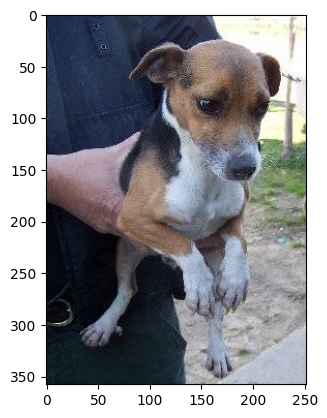

In [11]:
# Display the images of dogs and cats
# Display dog image
img = mpimg.imread('/content/train/dog.663.jpg')
imgplot = plt.imshow(img)
plt.show()

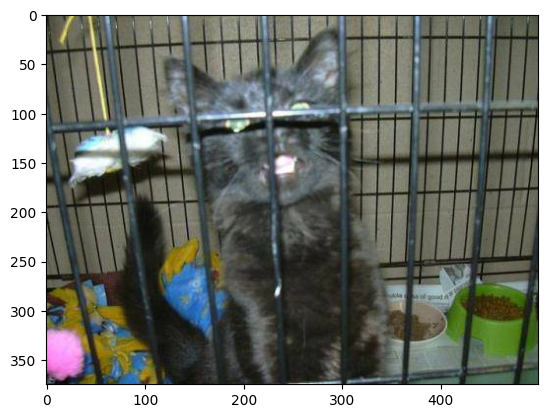

In [12]:
# Display cat image
img = mpimg.imread('/content/train/cat.195.jpg')
imgplot = plt.imshow(img)
plt.show()

In [13]:
 # calculating the number of dog and cat images
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_files in file_names:
  if img_files.startswith('dog'):
    dog_count += 1
  else:
    cat_count += 1

print('The number of dog images: ', dog_count)
print('The number of cat images: ', cat_count)

The number of dog images:  12500
The number of cat images:  12500


In [14]:
# Creating a directory for resized images
os.mkdir('/content/image_resized')

FileExistsError: [Errno 17] File exists: '/content/image_resized'

In [15]:
Org_folder = '/content/train/'
Resized_folder = '/content/image_resized/'

# Extracting 2000 images only because we will be working with pre-trained model
for i in range(2000):

  file_name = os.listdir(Org_folder)[i]
  img_path = Org_folder + file_name

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  img.save(Resized_folder + file_name)


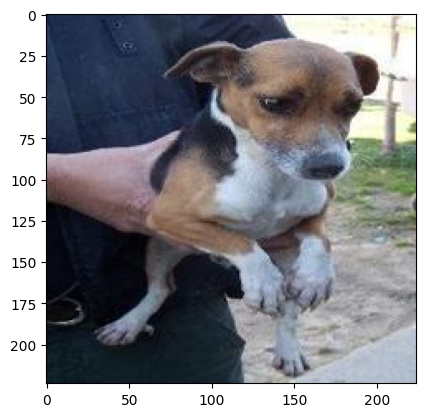

In [16]:
# Display resized dog image
img = mpimg.imread('/content/image_resized/dog.663.jpg')
imgplot = plt.imshow(img)
plt.show()

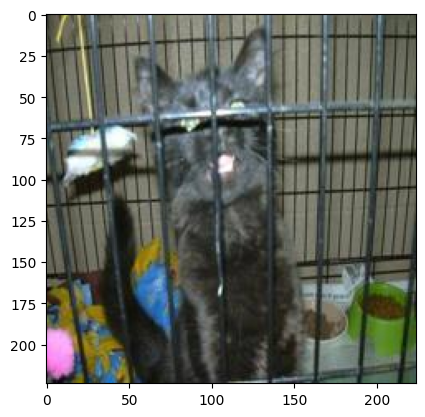

In [17]:
# Display resized cat image
img = mpimg.imread('/content/image_resized/cat.195.jpg')
imgplot = plt.imshow(img)
plt.show()

In [18]:
# Creating labels for resized images of dogs and cats
# Dog -> 1, Cat -> 0
# Creating a loop to assign labels
filename = os.listdir('/content/image_resized/')

labels = []

for i in range(2000):

  file_name = filename[i]
  if file_name.startswith('dog'):
    labels.append(1)
  else:
    labels.append(0)


In [19]:
print(filename[0:5])
print(len(filename))

['cat.1656.jpg', 'cat.12022.jpg', 'dog.4851.jpg', 'dog.7871.jpg', 'cat.195.jpg']
2000


In [20]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 1, 0]
2000


In [21]:
# Counting number of dogs and cats images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1010  990]


In [22]:
# Converting all resized images to numpy arrays because our models can read numbers and not images
import cv2
import glob

In [23]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [24]:
print(dog_cat_images)

[[[[202 197 198]
   [226 221 222]
   [211 206 207]
   ...
   [141 152 160]
   [114 125 133]
   [108 119 127]]

  [[211 206 207]
   [227 222 223]
   [211 206 207]
   ...
   [138 149 157]
   [100 111 119]
   [ 76  87  95]]

  [[212 207 208]
   [222 217 218]
   [205 200 201]
   ...
   [150 159 168]
   [105 114 123]
   [ 93 102 111]]

  ...

  [[206 210 215]
   [186 190 195]
   [167 171 176]
   ...
   [197 200 205]
   [189 192 197]
   [186 189 194]]

  [[180 184 189]
   [181 185 190]
   [181 187 192]
   ...
   [196 199 204]
   [192 195 200]
   [192 195 200]]

  [[153 157 162]
   [176 180 185]
   [194 200 205]
   ...
   [202 205 210]
   [202 205 210]
   [205 208 213]]]


 [[[202 197 194]
   [200 195 192]
   [200 195 192]
   ...
   [ 91  98 101]
   [105 112 115]
   [114 121 124]]

  [[202 197 194]
   [203 198 195]
   [204 199 196]
   ...
   [ 45  52  55]
   [ 51  58  61]
   [ 56  63  66]]

  [[204 199 196]
   [207 202 199]
   [208 203 200]
   ...
   [ 22  30  30]
   [ 25  33  33]
   [ 27  35

In [25]:
type(dog_cat_images)

numpy.ndarray

In [26]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [27]:
# Creating X, Y labels
X = dog_cat_images
Y = np.asarray(labels)

In [28]:
# Creating training and testing variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)
(2000,) (1600,) (400,)


In [30]:
# Scaling the data so all the values are in the range of 0 to 1
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [31]:
print(X_train_scaled)

[[[[1.         1.         0.96078431]
   [1.         1.         0.96078431]
   [1.         0.99215686 0.97647059]
   ...
   [0.98039216 1.         0.98823529]
   [0.98039216 1.         0.96862745]
   [0.96862745 1.         0.94509804]]

  [[1.         1.         0.96862745]
   [1.         1.         0.96470588]
   [1.         0.99215686 0.97647059]
   ...
   [0.95294118 0.98431373 0.98039216]
   [0.95294118 0.99607843 0.95686275]
   [0.94509804 0.99607843 0.94117647]]

  [[1.         1.         0.97254902]
   [1.         1.         0.96862745]
   [1.         0.98431373 0.98039216]
   ...
   [0.9254902  0.95294118 0.98823529]
   [0.92156863 0.96862745 0.96862745]
   [0.93333333 0.98823529 0.97254902]]

  ...

  [[0.36078431 0.37254902 0.42745098]
   [0.34901961 0.36078431 0.41568627]
   [0.3254902  0.3372549  0.39215686]
   ...
   [0.40784314 0.40784314 0.47058824]
   [0.41176471 0.41176471 0.48235294]
   [0.41568627 0.41568627 0.48627451]]

  [[0.35686275 0.37254902 0.41568627]
   [0.3

In [32]:
# Building the Neural Network using MobileNet
import tensorflow as tf
import tensorflow_hub as hub

In [33]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=10)

In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test loss: ', score)
print('Test accuracy: ', acc)

In [ ]:
# New Predictive System for new images

In [ ]:
input_image_path = input('Enter the path of the image to be predicted: ')

input_img = cv2.imread(input_image_path)

cv2.imshow(input_img)

input_img_resize = cv2.resize(input_img, (224, 224))

input_img_scaled = input_img_resize / 255

image_reshaped = np.reshape(input_img_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image is of a cat')
else:
  print('The image is of a dog')